# Use Case : Predicting House-Prices of Banglore City
### A data science approach to predict the house prices of Banglore City.


#### Regression use-case introduction: 
Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

the dataset contains information regarding the area_type, location, availability, size, house_specifications and price of the house. 
* Machine Learning issue and objectives
     We’re dealing with a supervised regression problem. The goal is to train the best machine learning model to maximize the predictive capability of the regression model so as to accurately predict the house prices of metro cities especialy, banglore.

* Performance Metric
    The metric used for the models’ evaluation is the ROC AUC given that we’re dealing with a highly unbalanced data.

* Project structure
    The project divides into three categories:
* EDA: Exploratory Data Analysis
* Data Wrangling: Cleansing and Feature Selection
* Feature Engineering
* Machine Learning: Predictive Modelling

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import pickle
import os

import numpy as np
import pandas as pd
pd.set_option("display.max_columns",100)
from scipy import stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from katonic.ml.client import set_exp
from katonic.ml.classification import Classifier

import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.gridspec as gridspec

In [2]:
#Let's read the data first

data=pd.read_csv('Bengaluru_House_Data.csv')
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
#to get the information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

### Exploratory Data Analysis

#### univariate analysis

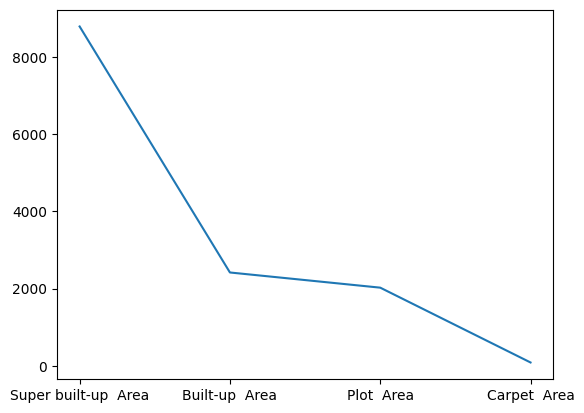

In [5]:
plt.plot(data['area_type'].value_counts())

In [6]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [7]:
def convert_sqft_tonum(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [8]:
data=data.copy()
data['total_sqft']=data['total_sqft'].apply(convert_sqft_tonum)

<Figure size 1400x600 with 0 Axes>

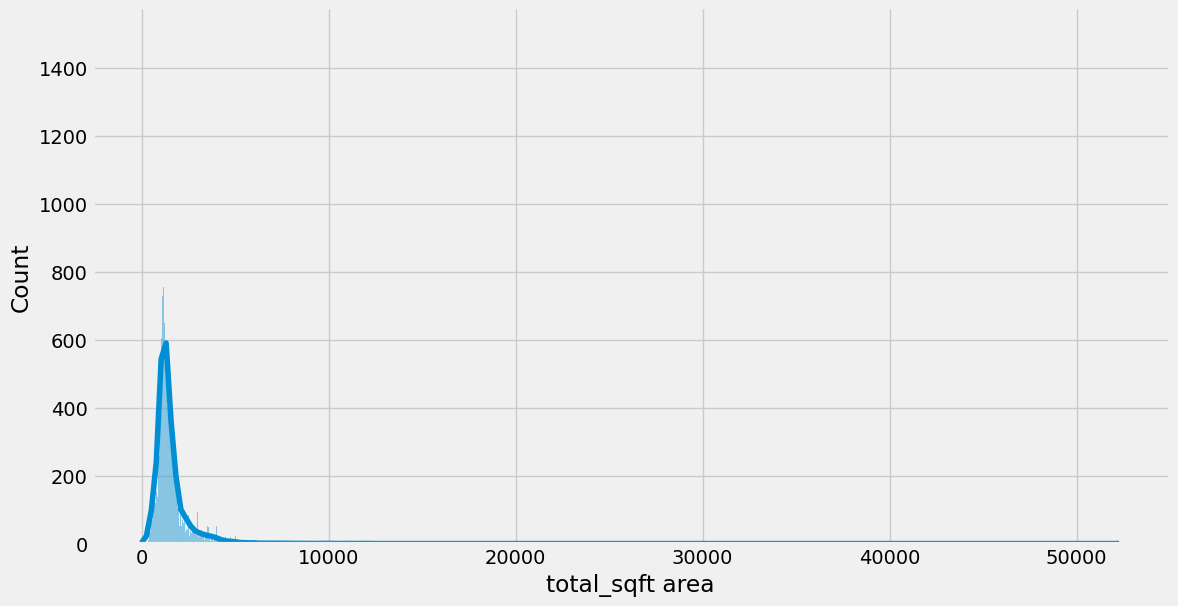

In [9]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,6))
sb.displot(x = data["total_sqft"].values, kde = True, height = 6, aspect = 2)
plt.xlabel("total_sqft area");

7


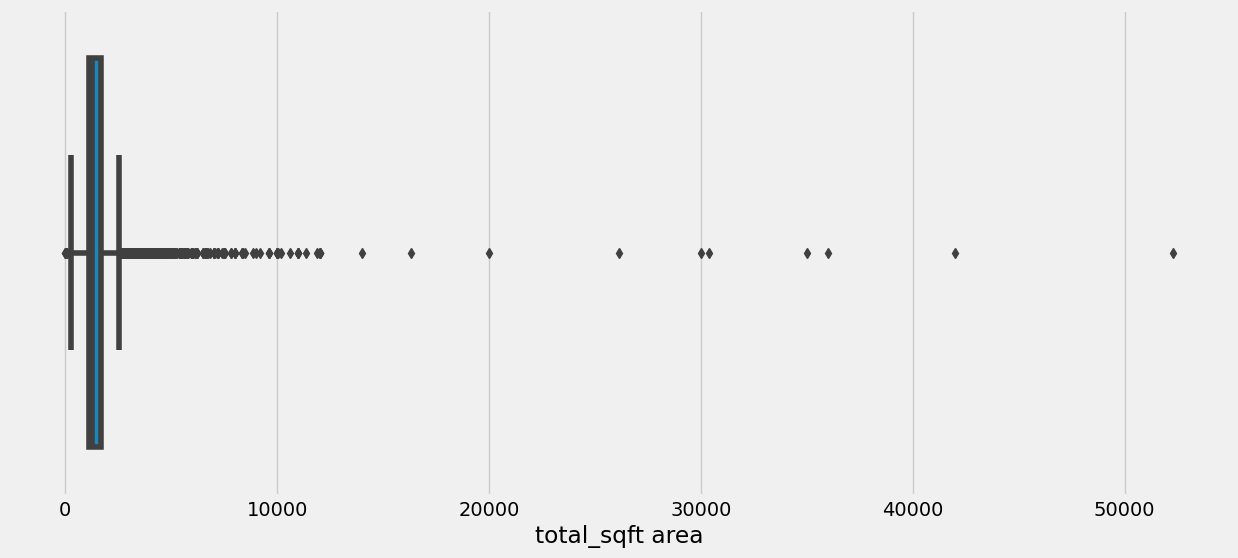

In [10]:
outier_count = data[data['total_sqft']>20000]
print(outier_count.shape[0])

#7 values can be treated as outliers

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,6))
sb.boxplot(x = data["total_sqft"])
plt.xlabel("total_sqft area");

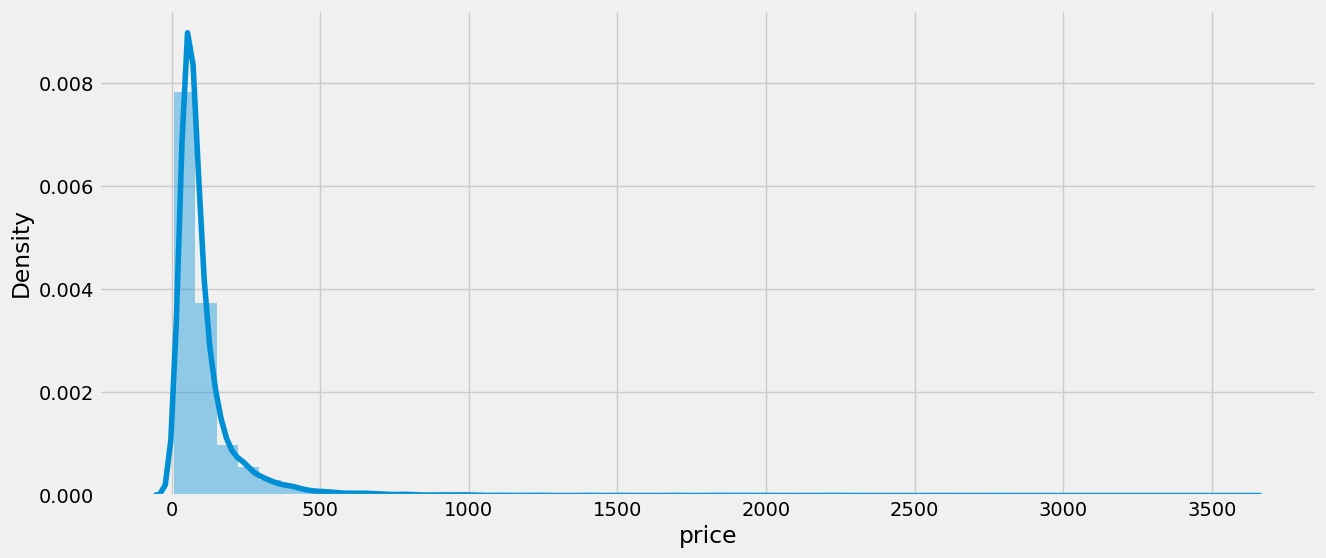

In [11]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,6))
sb.distplot(x = data["price"].values, kde = True)
plt.xlabel("price");

13


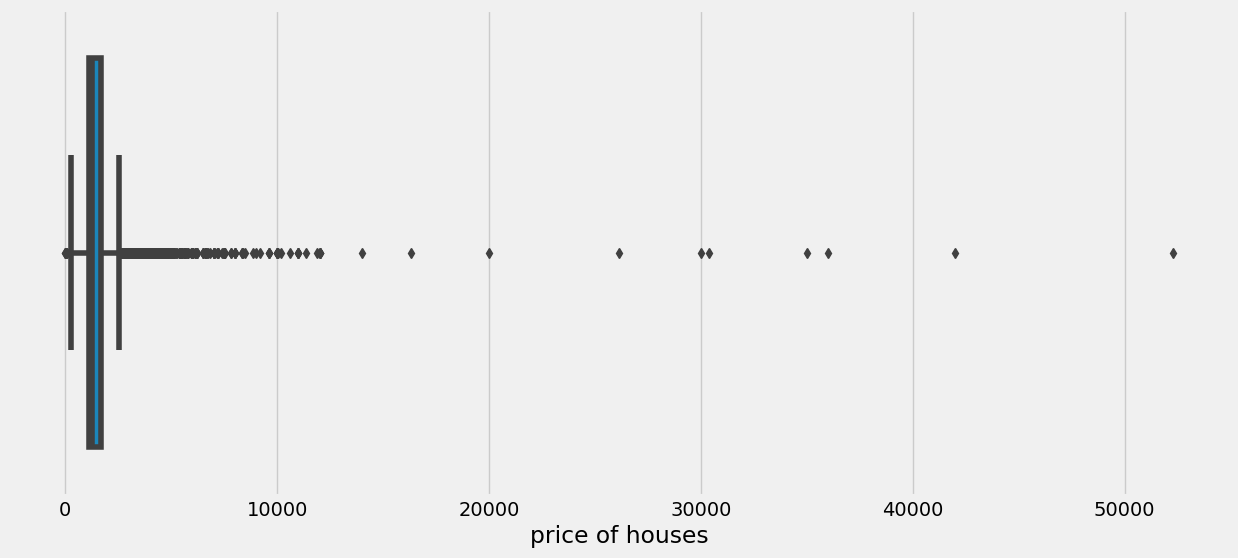

In [12]:
outier_count = data[data['price']>2000]
print(outier_count.shape[0])

#13 values are treated as outliers

plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,6))
sb.boxplot(x = data["total_sqft"])
plt.xlabel("price of houses");

In [13]:
data_loc = data[['location']]

lc_grp = data_loc.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [14]:
demanded_10_locs = data['location'].value_counts()
demanded_df = pd.DataFrame({'location_names':demanded_10_locs[:10].index, 'no_of_houses':demanded_10_locs[:10].values})
demanded_df

,location_names,no_of_houses
0,Whitefield,540
1,Sarjapur Road,399
2,Electronic City,302
3,Kanakpura Road,273
4,Thanisandra,234
5,Yelahanka,213
6,Uttarahalli,186
7,Hebbal,177
8,Marathahalli,175
9,Raja Rajeshwari Nagar,171


location
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1305, dtype: int64


Text(0.5, 0, 'no_of_houses')

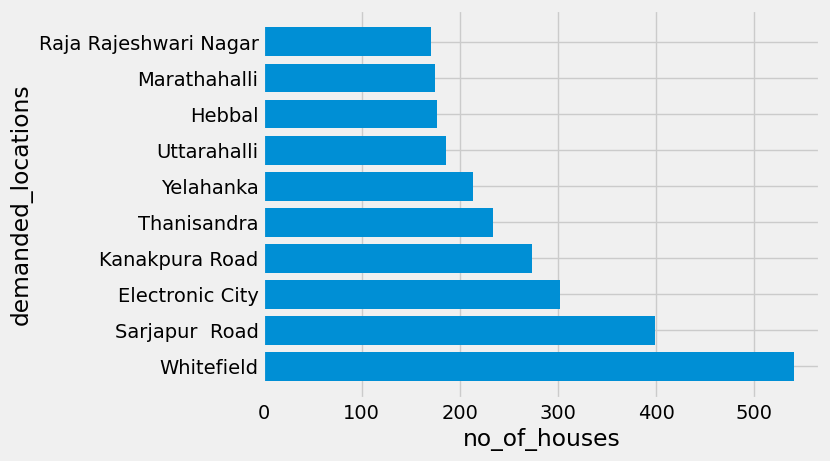

In [15]:
print(lc_grp)

plt.barh(demanded_df['location_names'],demanded_df['no_of_houses'],)
plt.ylabel("demanded_locations")
plt.xlabel("no_of_houses")

#### Bivariate Analysis

<Axes: >

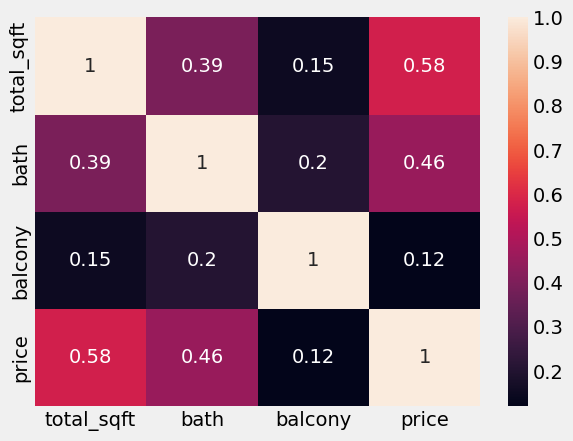

In [16]:
sb.heatmap(data.corr(),annot=True)

##### no_of_bathrooms and total_sqft_area are highly correlated to price column, hence better features for feature selection.
##### balcony is not much correlated to price col, i.e. will not add any significant change to model parameters...can be dropped off

In [17]:
'''
import psych as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_v(data,data)
'''

'\nimport psych as ss\n\ndef cramers_v(x, y):\n    confusion_matrix = pd.crosstab(x,y)\n    chi2 = ss.chi2_contingency(confusion_matrix)[0]\n    n = confusion_matrix.sum().sum()\n    phi2 = chi2/n\n    r,k = confusion_matrix.shape\n    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))\n    rcorr = r-((r-1)**2)/(n-1)\n    kcorr = k-((k-1)**2)/(n-1)\n    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))\n\ncramers_v(data,data)\n'

Text(0.5, 1.0, 'relation between area_type and price of houses')

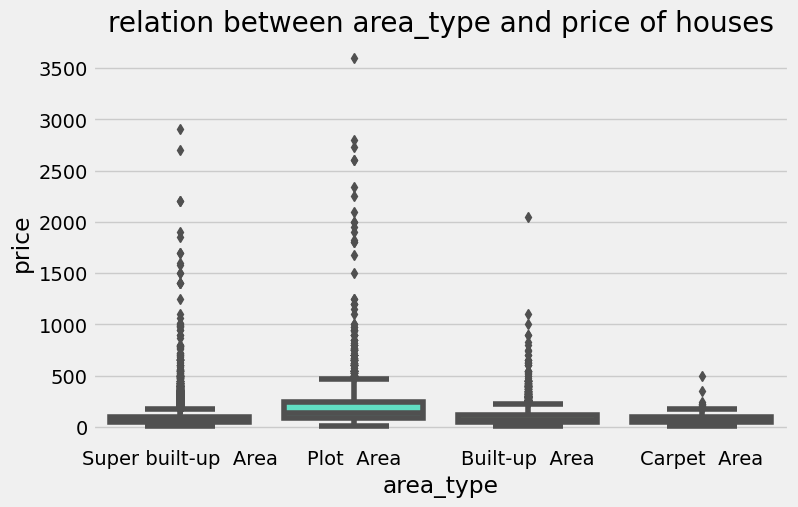

In [18]:
plt.figure(figsize=(8,5))

sb.boxplot(x='area_type',y='price',data=data, palette='rainbow',)
plt.title("relation between area_type and price of houses")

<Axes: xlabel='area_type', ylabel='price'>

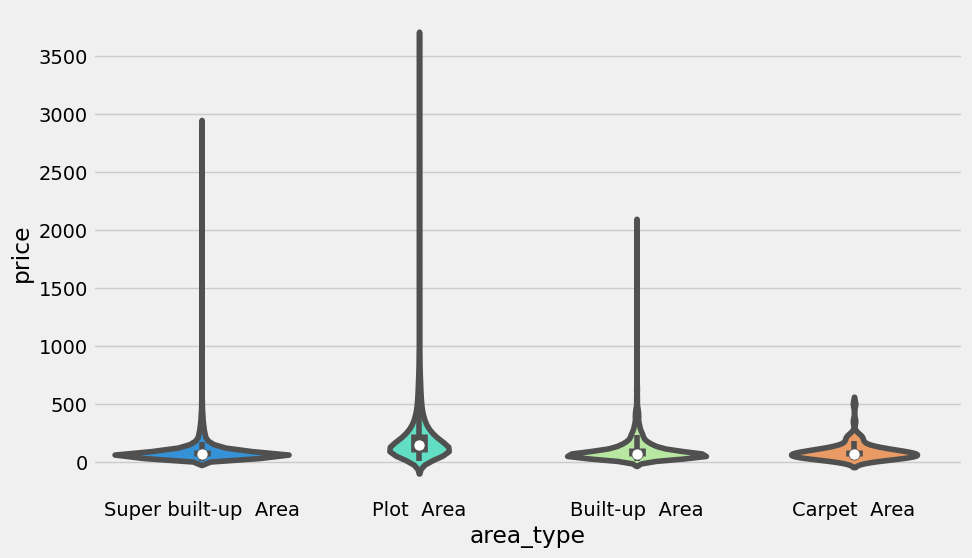

In [19]:
plt.figure(figsize=(10,6))
sb.violinplot(x='area_type',y='price',data=data,palette='rainbow')

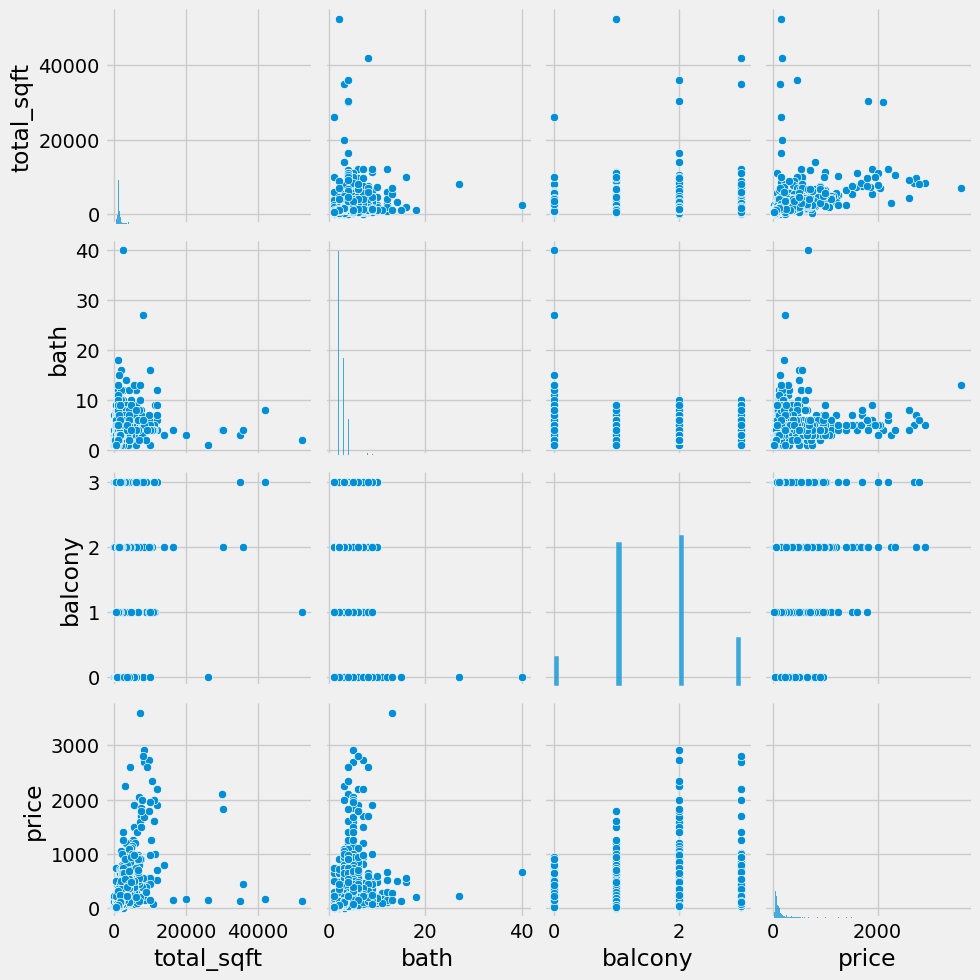

In [20]:
sb.pairplot(data)

#### from above plot it seems that, scatter is almost linear and columns are also linearly dependent on independent column i.e. price 

## Data Cleaning
 
#### as area_type, availability, balcony and society columns are secondary parameters that will not add any value to the price column during prediction,only increase dimensions of the data.

In [21]:
data=data.drop(['area_type','availability','balcony','society'],axis=1)
data

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00
13316,Richards Town,4 BHK,3600.0,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00


In [22]:
data['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

#### Let's remove the Null values from the dataset

In [23]:
data.isnull().sum()

location       1
size          16
total_sqft    46
bath          73
price          0
dtype: int64

In [24]:
count=0
for i in data.columns:
    cols = data.columns
    print(f"null values at {cols[count]} are {data[i].isnull().sum()/data.shape[0]*100} %")
    count+=1

null values at location are 0.0075075075075075074 %
null values at size are 0.12012012012012012 %
null values at total_sqft are 0.34534534534534533 %
null values at bath are 0.5480480480480481 %
null values at price are 0.0 %


##### as from the above it seems that total_sqft and price doesn't contain any null values
##### location col also has negligible null values ~ 1, can be dropped off
##### size contain 16 null_values can be dropped, will not add any significant change in the dataset.

In [25]:
data = data.dropna()
'''
data['location']=data['location'].dropna()
data['size']=data['size'].dropna()
'''

"\ndata['location']=data['location'].dropna()\ndata['size']=data['size'].dropna()\n"

In [26]:
data_val = data.groupby('size').count()
data_val

,location,total_sqft,bath,price
size,,,,
1 BHK,527,527,527,527
1 Bedroom,100,100,100,100
1 RK,13,13,13,13
10 BHK,2,2,2,2
10 Bedroom,12,12,12,12
11 BHK,2,2,2,2
11 Bedroom,2,2,2,2
12 Bedroom,1,1,1,1
13 BHK,1,1,1,1


In [27]:
print(type(data['bath'][0]))
print(data['bath'].unique())
print(data['bath'].value_counts())

<class 'numpy.float64'>
[ 2.  5.  3.  4.  6.  1.  9.  8.  7. 11. 10. 14. 27. 12. 16. 40. 15. 13.
 18.]
2.0     6893
3.0     3274
4.0     1222
1.0      781
5.0      521
6.0      269
7.0      102
8.0       64
9.0       41
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64


In [28]:
#the null values from the bath col can be replaced by most frequent value from the data.

data['bath'] = data['bath'].fillna(2.0)

### Feature Engineering

In [29]:
#size column has to be converted into numeric format.

data['BHK']=data['size'].apply(lambda x: int(x.split(' ')[0]))

In [30]:
data.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [31]:
data['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [32]:
data[data.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000.0,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400.0,40.0,660.0,43


In [33]:
data.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [34]:
#data[~data['total_sqft'].apply(isfloat)].head(10)

In [35]:
data.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

#### Add new feature as "price per sqrt"

In Most of the Cities to buy a land price_per_sqft is taken into account, hence this new feature will add value during the prediction

In [36]:
data1=data.copy()
data1['price_per_sqft']=data1['price']*1000000/data1['total_sqft']
data1.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000


In [37]:
len(data1.location.unique())

1298

In [38]:
data1.location=data1.location.apply(lambda x: x.strip())
location_stats=data1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [39]:
### from above Whitefield is mispelled to whitefiled,
data['location'] = data['location'].apply(lambda x:x.replace('whitefiled','Whitefield'))

#### the most Expensive/demanding in banglore are Whitefield, Sarjapur Road, Electronic City, Kanakpura road. 
* one reason would be be more companies could situated in these areas.
* high demanding area ~ higher price rates.

In [40]:
len(location_stats[location_stats<=10])

1047

In [41]:
locationlessthan10=location_stats[location_stats<=10]
locationlessthan10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [42]:
data1.location=data1.location.apply(lambda x: 'other' if x in locationlessthan10 else x)
len(data1.location.unique())

241

In [43]:
data1[data1.total_sqft/data1.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,362745.098039
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,333333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,106609.808102
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,62962.962963
70,other,3 Bedroom,500.0,3.0,100.0,3,200000.000000


In [44]:
data2=data1[~(data1.total_sqft/data1.BHK<300)]
data2.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,32478.632479
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,74670.571010
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,181818.181818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,48282.442748
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,38888.888889


In [45]:
170*362745.098039

61666666.66663

In [46]:
528*36998.106061

19535000.000207998

### Remove the Outlier

In [47]:
data2["price_per_sqft"].describe().apply(lambda x:format(x,'f'))

count      12456.000000
mean       63085.028260
std        41681.273385
min         2678.298133
25%        42105.263158
50%        52941.176471
75%        69166.666667
max      1764705.882353
Name: price_per_sqft, dtype: object

In [48]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data3=remove_pps_outliers(data2)
data3.shape

(10242, 7)

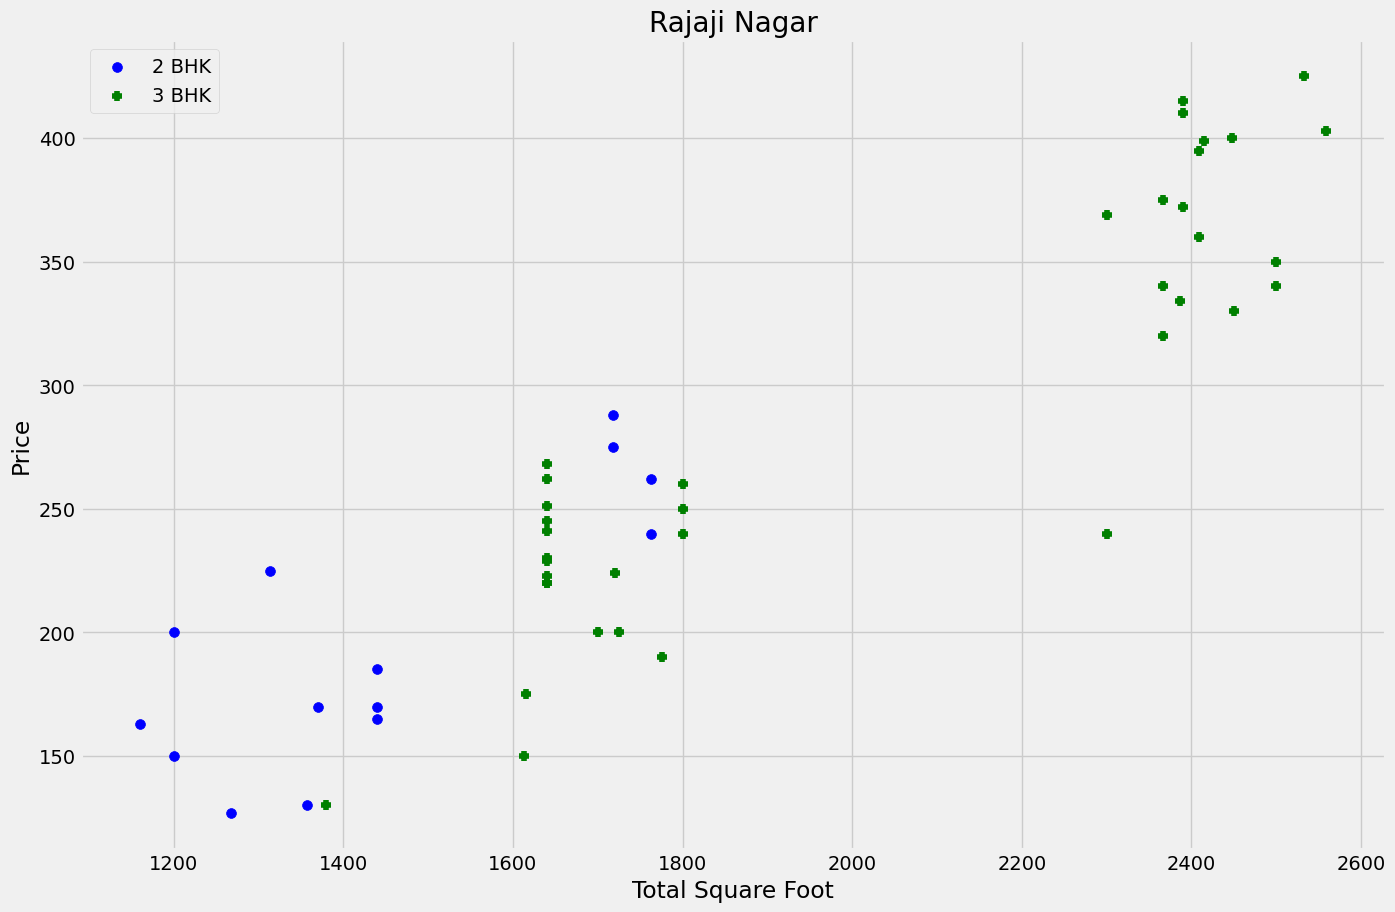

In [49]:
import matplotlib.pyplot as plt
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='Blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3 BHK',s=50)
    plt.xlabel('Total Square Foot')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
plot_scatter_chart(data3,"Rajaji Nagar")

#### outlier from bhk column

In [50]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_sats={}
        for BHK,BHK_df in location_df.groupby('BHK'):
            bhk_sats[BHK]={
                'mean':np.mean(BHK_df.price_per_sqft),
                'std':np.std(BHK_df.price_per_sqft),
                'count':BHK_df.shape[0]
            }
        for BHK,BHK_df in location_df.groupby('BHK'):
            stats=bhk_sats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data4=remove_bhk_outliers(data3)
data4.shape

(7317, 7)

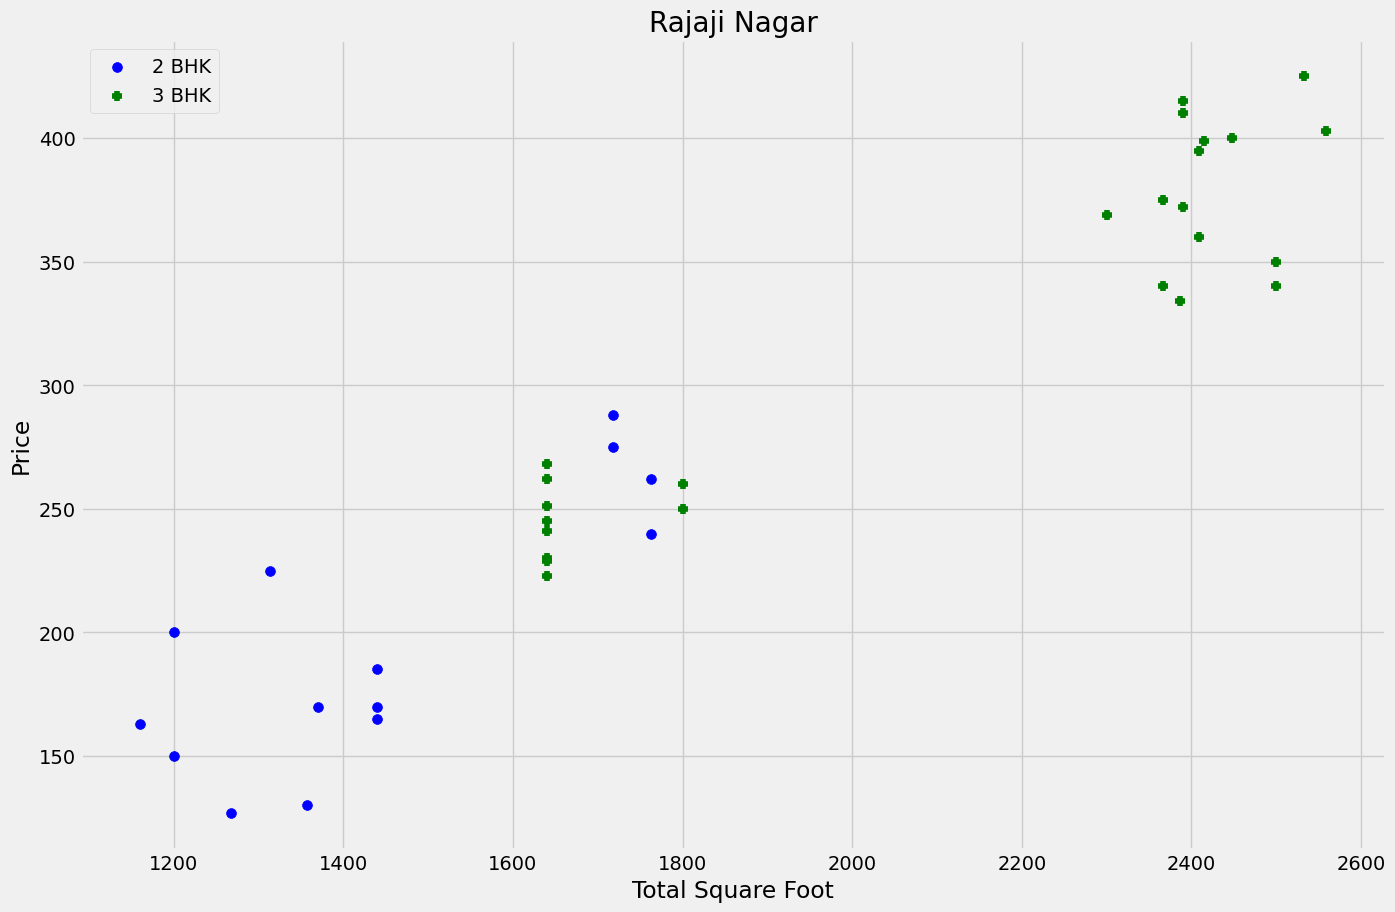

In [51]:
plot_scatter_chart(data4,"Rajaji Nagar")

Text(0, 0.5, 'Count')

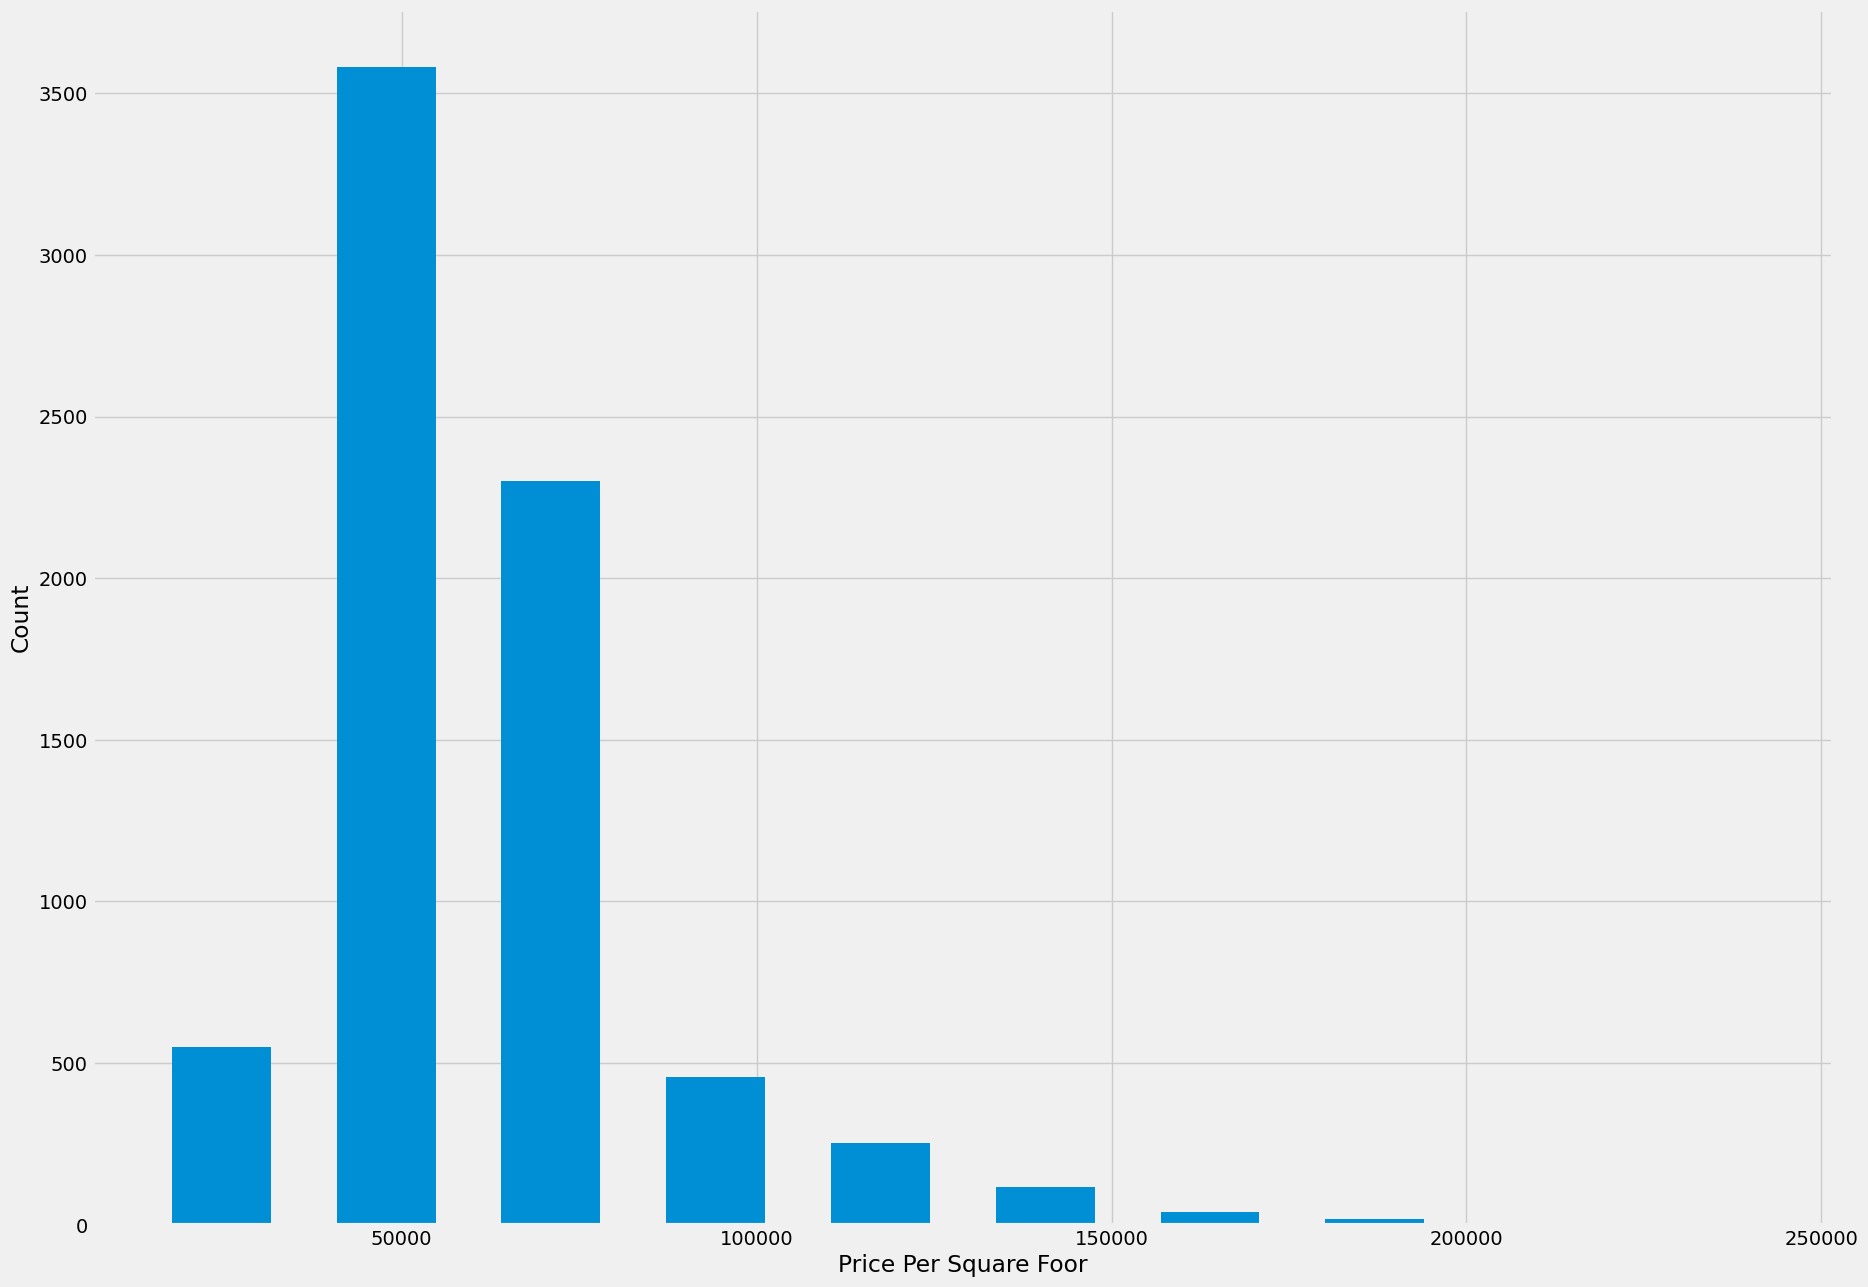

In [52]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(data4.price_per_sqft,rwidth=0.6)
plt.xlabel("Price Per Square Foor")
plt.ylabel("Count")

#### outlier removal from bath column

In [53]:
print(data4.bath.unique())
print('----------------------')
print(data4[data4.bath>10])

[ 4.  3.  2.  5.  8.  1.  6.  7.  9. 12. 16. 13.]
----------------------
            location    size  total_sqft  bath  price  BHK  price_per_sqft
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     40000.00000
8483           other  10 BHK     12000.0  12.0  525.0   10     43750.00000
8572           other  16 BHK     10000.0  16.0  550.0   16     55000.00000
9306           other  11 BHK      6000.0  12.0  150.0   11     25000.00000
9637           other  13 BHK      5425.0  13.0  275.0   13     50691.24424


Text(0, 0.5, 'Count')

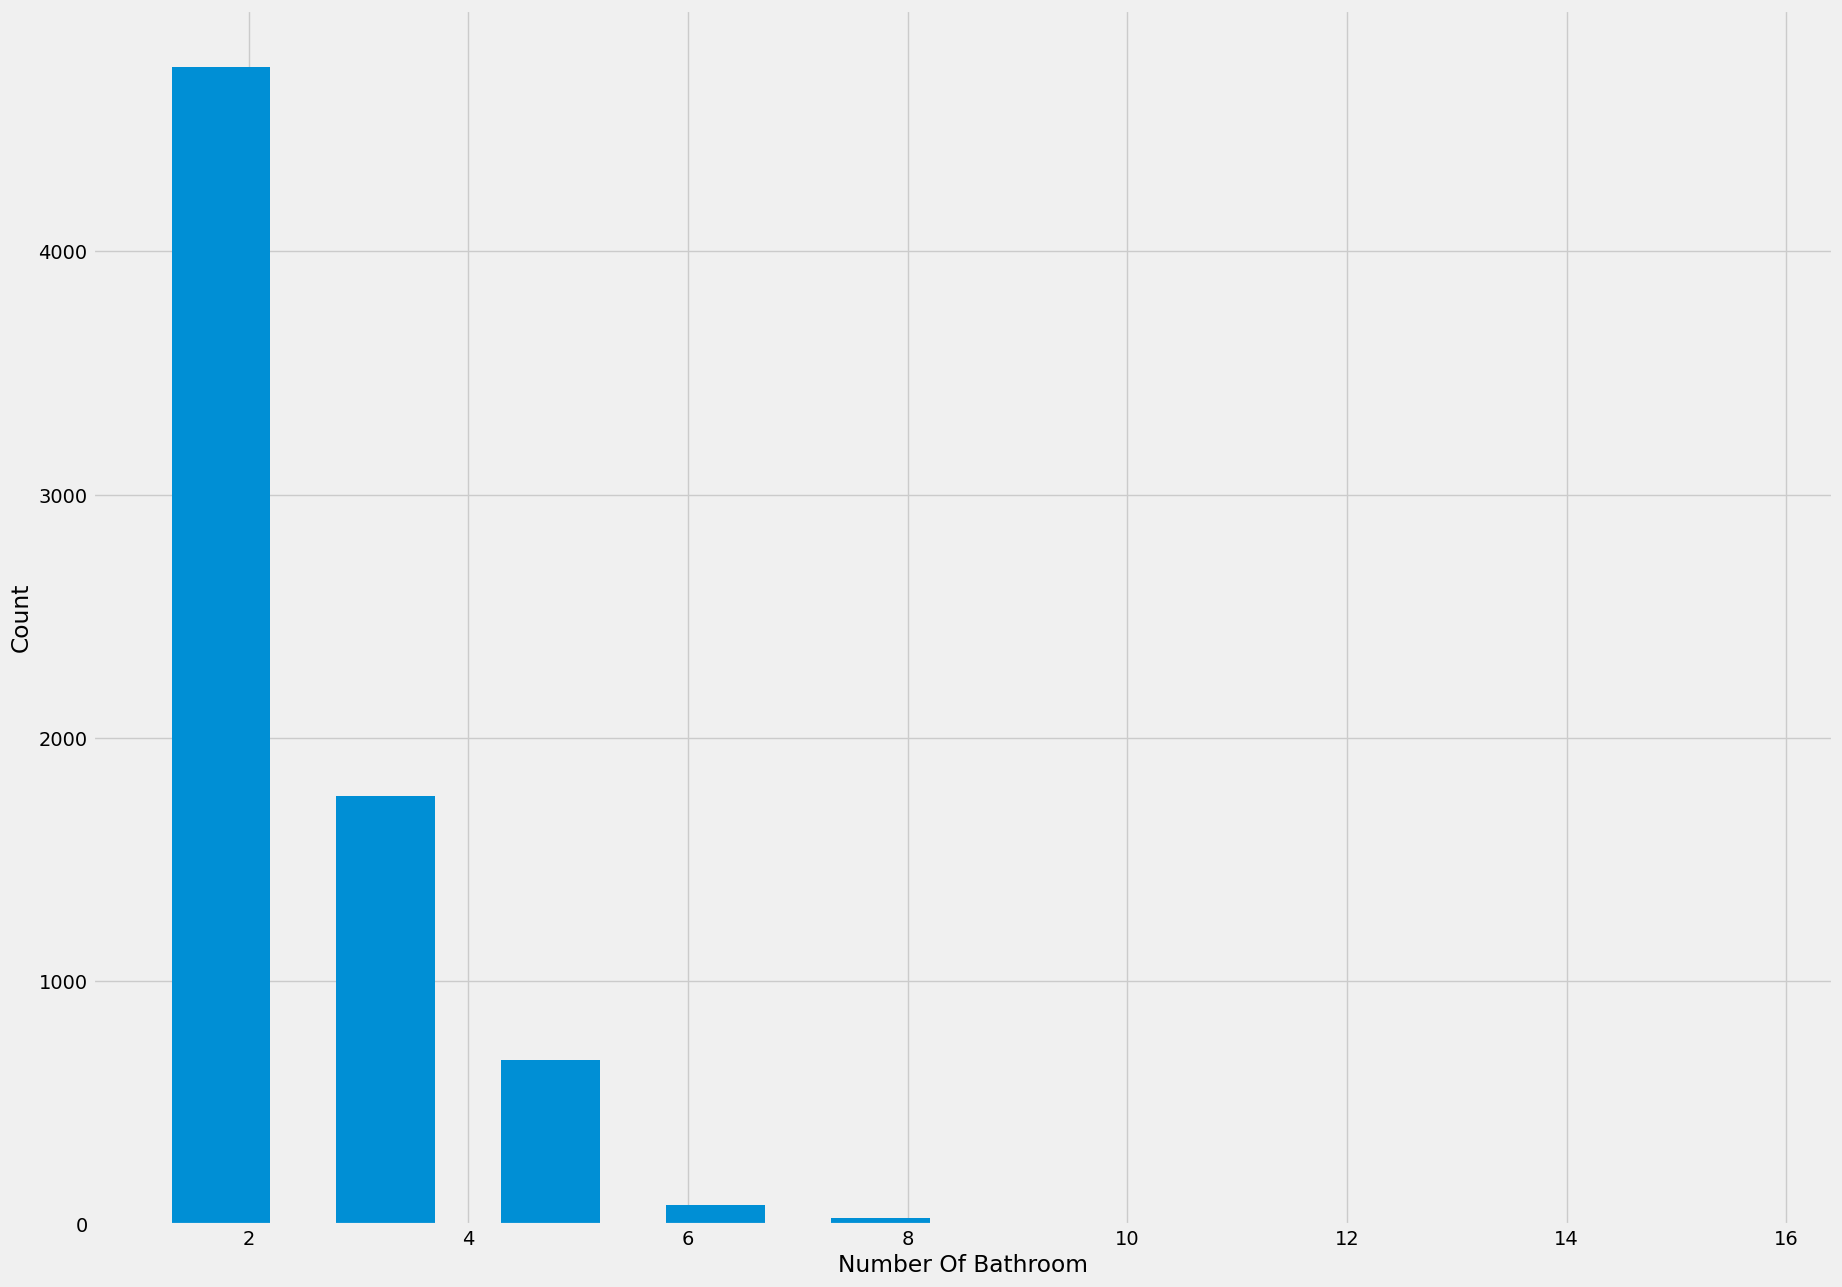

In [54]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(data4.bath,rwidth=0.6)
plt.xlabel("Number Of Bathroom")
plt.ylabel("Count")

In [55]:
data4[data4.bath>data4.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,32520.325203
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,64285.714286
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,64230.343300
8408,other,6 BHK,11338.0,9.0,1000.0,6,88198.976892


In [56]:
data5=data4[data4.bath<data4.BHK+2]
data5.shape

(7239, 7)

In [57]:
data6=data5.drop(['size','price_per_sqft'],axis='columns')
data6

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10233,other,1200.0,2.0,70.0,2
10234,other,1800.0,1.0,200.0,1
10237,other,1353.0,2.0,110.0,2
10238,other,812.0,1.0,26.0,1


#### Convert the categorical columns into numeric ones so as to fit the dataset into the ML Model

In [58]:
dummies=pd.get_dummies(data6.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,...,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
data7=pd.concat([data6,dummies.drop('other',axis='columns')],axis='columns')
data7.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,...,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
data8=data7.drop('location',axis='columns')
data8.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,...,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Machine Learning
### For that we will use Katonic's Auto Machine Learning package.
### Katonic Auto Machine Learning
KAML is a library in python that manages machine learning lifecycle. In comparison, packaging ML code makes it more reusable and reproducible form which makes experiments more fast and efficient. KAML is a python wrapper around several machine learning libraries and it also tracks experiments to record and compare parameters and results, providing a model store for managing the whole lifetime of a model, including model versioning, stage transitions, and annotations in a collaborative manner.

* classification - Supports classification models such as Random Forest ,Ada Boost ,Gradient Boosting ,XG Boost ,Support Vector classifier etc. 

* Regression - Support models like LinearRegression, RidgeRegression ,LassoRegression ,SupportVectorRegressor etc. Calculates various evaluation parameters like MSE ,RMSE ,MAE ,RMSLE for the problem,predict the model and evaluate metrics function and logs the required metrics.

* Timeseries - Automatic forecasting procedure (Prophet) that predicts and evaluate MAE ,r2_score ,RMSE.

* Hyperparameter Tuning - An Automatic Hyperparameter Tuning tool that makes Hyperparameter tuning easier, supported for all the available regression and classification models in KAML.

### Capabilities of Katonic Auto ML: 
* To track the model performances.
* To track the metrics we wanna register.
* To store the serialized models.
* To store the parameters.
* To perform Hyper parameter Optimization.
* To find the best model out of all the experiments.

In [61]:
# Splitting the Dataset.

X=data8.drop('price',axis='columns')
y=data8.price

#### Split the dataset into training and validation sets

In [62]:
# Before doing the training. We need to split the data for training and testing.
# Separating the data into Dependent and independent features.

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#### Set Experiment

In [63]:
#set up the exp name

exp_name = "house_price_prediction_mlflow_sdk_test"

set_exp(exp_name)

<Experiment: artifact_location='s3://models/22', creation_time=1679995923151, experiment_id='22', last_update_time=1679995923151, lifecycle_stage='active', name='house_price_prediction_mlflow_sdk_test', tags={}>

#### Mlflow Tags

In [64]:
artifacts = {
    "data_path": "/home/katonic/House_Price_Pred/Bengaluru_House_Data.csv",
}

In [65]:
!pwd

/home/katonic/House_Price_Pred


In [66]:
from katonic.ml.regression import Regressor

In [67]:
regressor = Regressor(
    X_train,
    X_test,
    y_train,
    y_test,
    experiment_name=exp_name,
    source_name="House_Price_pred_mlflow_sdk_test.ipynb", # /home/katonic/model-cluster-backup/
    features=X_train.columns.to_list(),
    artifacts=artifacts,
)

In [68]:
regressor.artifact_paths

{'data_path': '/home/katonic/House_Price_Pred/Bengaluru_House_Data.csv'}

In [69]:
regressor.source_name

'House_Price_pred_mlflow_sdk_test.ipynb'

In [70]:
exp_id = regressor.id

In [71]:
# Now we have successfully setup our Evironment to experiement all the models

#### before choosing any model let's visualize our dataset

Text(0, 0.5, 'PC2')

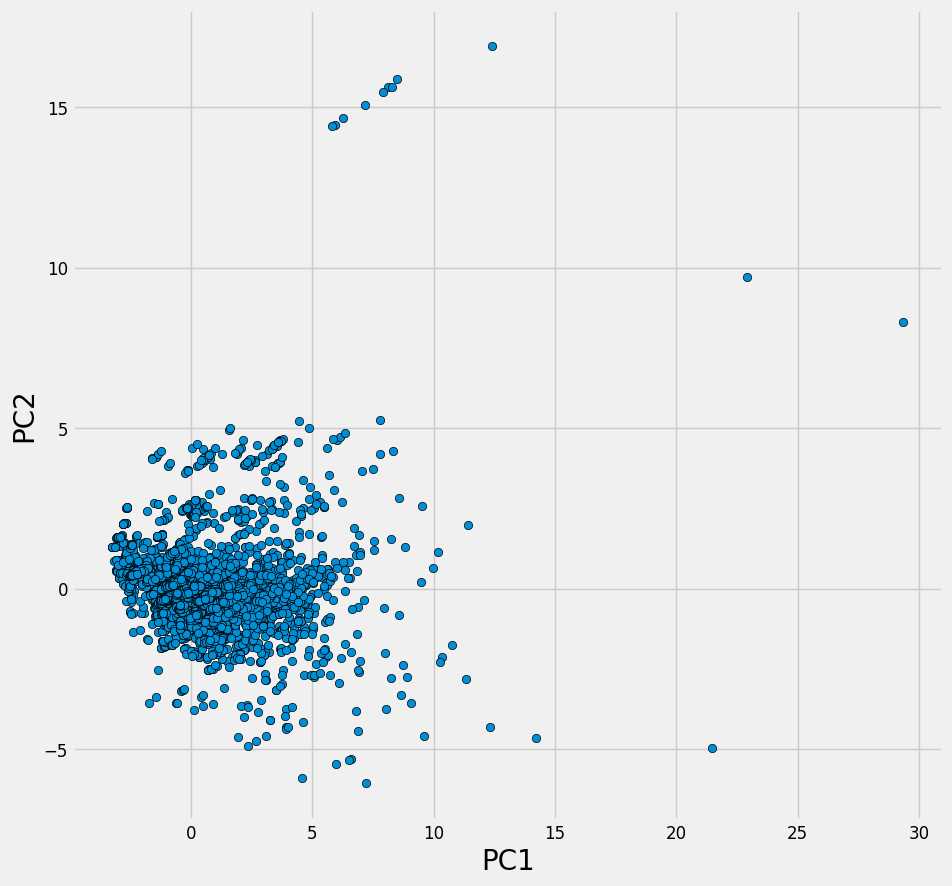

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Scale the data
scaler = StandardScaler()
scaler.fit(data8)
scaled = scaler.transform(data8)

#Obtain principal components
pca = PCA().fit(scaled)

pc = pca.transform(scaled)
pc1 = pc[:,0]
pc2 = pc[:,1]

#Plot principal components
plt.figure(figsize=(10,10))

plt.scatter(pc1,pc2,edgecolors='#000000')
plt.ylabel("Glucose",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('PC1')
plt.ylabel('PC2')

#### As data seems to be linear, so a line will best fit the model, we can apply linear models to predict the house prices

### Linear Regression

In [76]:
import plotly

regressor.LinearRegression()

params = {
    "normalize": [True, False],
    "fit_intercept": [True, False],
} 

regressor.LinearRegression(is_tune = True, params = params)

2023/03/28 11:10:30 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

[I 2023-03-28 11:10:37,600] A new study created in memory with name: no-name-7e476511-453f-4c90-b71d-3ac8f8f60bee
[I 2023-03-28 11:10:40,594] Trial 0 finished with value: 0.8623153573128494 and parameter

Number of finished trials:  5
Best trial:
  R2:  0.8623153573128494
  Params: 


#### Search Runs

In [78]:
regressor.search_runs("22")

In [82]:
best_model_name = x['run_name'][0]
best_model_run_id = x['run_id'][0]

'a217e4d8c9744b438b3d7bcb2b758bd9'

#### Register Model

In [81]:
regressor.register_model(
    model_name= best_model_name
    run_id=best_model_run_id,
)

2023/03/28 11:21:02 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: house_price_prediction_mlflow_sdk_test_22_Linear_regression, version 2


Registered Model (name=house_price_prediction_mlflow_sdk_test_22_Linear_regression) already exists. Adding new versions to it.


name: "house_price_prediction_mlflow_sdk_test_22_Linear_regression"
version: "2"
creation_timestamp: 1680002462079
last_updated_timestamp: 1680002462079
user_id: ""
current_stage: "None"
description: ""
source: "s3://models/22/f84f49996a8d4b0eb083f2536999e1df/artifacts/house_price_prediction_mlflow_sdk_test_22_Linear_regression"
run_id: "f84f49996a8d4b0eb083f2536999e1df"
status: READY
run_link: ""

#### Change Stage

In [79]:
regressor.change_stage(
    model_name="house_price_prediction_mlflow_sdk_test_22_Linear_regression",
    ver_list=["1"],
    stage="Staging",
)

#### Model Versions

In [82]:
regressor.model_versions(model_name="house_price_prediction_mlflow_sdk_test_22_Linear_regression")

['2', '1']

#### Delete Model Version

In [84]:
regressor.delete_model_version(
    model_name="house_price_prediction_mlflow_sdk_test_22_Linear_regression",
    ver_list=["1"],
)

#### Delete Registered Model

In [ ]:
regressor.delete_reg_model(
    model_name="house_price_prediction_mlflow_sdk_test_22_Linear_regression",
)

#### Delete Run by id

In [ ]:
regressor.delete_run_by_id(["f84f49996a8d4b0eb083f2536999e1df"])

#### Check Katonic package version

In [85]:
regressor.version()

'1.6.1'

### Decision Tree Regressor

In [73]:
import plotly

parames = {
   "splitter":["best","random"],
   "max_depth" : [1,3,5,7,9,11,12],
   "max_features":["auto","log2","sqrt",None],
   "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
}

regressor.DecisionTreeRegressor(is_tune = True, params = parames,n_trials=6)

2023/03/29 04:43:11 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

[I 2023-03-29 04:43:15,565] A new study created in memory with name: no-name-05b23330-5ebd-44eb-90d3-21d79d3e9f37
[I 2023-03-29 04:43:18,616] Trial 0 finished with value: 0.8467936272182164 and parameter

Number of finished trials:  6
Best trial:
  R2:  0.8479925604664493
  Params: 


In [91]:
logged_reg_models = regressor.search_runs("22")

### Ridge Regression: L2 regularization

In [76]:
parames = {
   'alpha': [1,2],
   'selection': ['random', 'cyclic']
}

regressor.RidgeRegression(is_tune = True, params = parames)

[I 2023-03-29 04:48:59,502] A new study created in memory with name: no-name-2a57edc2-5034-45b1-93ff-85327bef1495
[I 2023-03-29 04:49:02,377] Trial 0 finished with value: 0.8815806753788039 and parameters: {}. Best is trial 0 with value: 0.8815806753788039.
[I 2023-03-29 04:49:05,455] Trial 1 finished with value: 0.8815806753788039 and parameters: {}. Best is trial 0 with value: 0.8815806753788039.
[I 2023-03-29 04:49:08,618] Trial 2 finished with value: 0.8815806753788039 and parameters: {}. Best is trial 0 with value: 0.8815806753788039.
[I 2023-03-29 04:49:12,078] Trial 3 finished with value: 0.8815806753788039 and parameters: {}. Best is trial 0 with value: 0.8815806753788039.
[I 2023-03-29 04:49:15,059] Trial 4 finished with value: 0.8815806753788039 and parameters: {}. Best is trial 0 with value: 0.8815806753788039.


Number of finished trials:  5
Best trial:
  R2:  0.8815806753788039
  Params: 


### Lasso Regression: L1 Regularization

In [77]:
parames = {
   'alpha': [1,2],
   'selection': ['random', 'cyclic']
}

regressor.LassoRegression(is_tune = True, params = parames)

[I 2023-03-29 04:49:18,344] A new study created in memory with name: no-name-ce40783c-b4d3-482d-88fb-e60c5d69748c
[I 2023-03-29 04:49:23,151] Trial 0 finished with value: 0.7601234627294875 and parameters: {}. Best is trial 0 with value: 0.7601234627294875.
[I 2023-03-29 04:49:27,845] Trial 1 finished with value: 0.7601234627294875 and parameters: {}. Best is trial 0 with value: 0.7601234627294875.
[I 2023-03-29 04:49:30,868] Trial 2 finished with value: 0.7601234627294875 and parameters: {}. Best is trial 0 with value: 0.7601234627294875.
[I 2023-03-29 04:49:33,770] Trial 3 finished with value: 0.7601234627294875 and parameters: {}. Best is trial 0 with value: 0.7601234627294875.
[I 2023-03-29 04:49:36,900] Trial 4 finished with value: 0.7601234627294875 and parameters: {}. Best is trial 0 with value: 0.7601234627294875.


Number of finished trials:  5
Best trial:
  R2:  0.7601234627294875
  Params: 


### Elastic Net Regressor

In [78]:
parames = {
   'alpha': [1,2],
    'l1_ratio':[0.2,0.3,0.5,0.1]
}

regressor.ElasticNet(is_tune = True, params = parames)

[I 2023-03-29 04:49:39,869] A new study created in memory with name: no-name-ec74c94c-40f4-452d-9c0d-6b2b180bb034
[I 2023-03-29 04:49:42,710] Trial 0 finished with value: 0.7588289693434019 and parameters: {}. Best is trial 0 with value: 0.7588289693434019.
[I 2023-03-29 04:49:45,705] Trial 1 finished with value: 0.7588289693434019 and parameters: {}. Best is trial 0 with value: 0.7588289693434019.
[I 2023-03-29 04:49:49,463] Trial 2 finished with value: 0.7588289693434019 and parameters: {}. Best is trial 0 with value: 0.7588289693434019.
[I 2023-03-29 04:49:52,462] Trial 3 finished with value: 0.7588289693434019 and parameters: {}. Best is trial 0 with value: 0.7588289693434019.
[I 2023-03-29 04:49:55,327] Trial 4 finished with value: 0.7588289693434019 and parameters: {}. Best is trial 0 with value: 0.7588289693434019.


Number of finished trials:  5
Best trial:
  R2:  0.7588289693434019
  Params: 


### Support Vector Regressor

In [79]:
parames = {
    'kernel': ('linear', 'rbf','poly'), 
    'C':[1.5, 10],'gamma': [1e-7, 1e-4],
    'epsilon':[0.1,0.2,0.5,0.3],
}

regressor.SupportVectorRegressor(is_tune = True, params = parames)

[I 2023-03-29 04:50:05,305] A new study created in memory with name: no-name-f32d6faf-217a-4d1e-acfd-f2e6b8d0c782
[I 2023-03-29 04:50:15,631] Trial 0 finished with value: 0.4450793070483593 and parameters: {}. Best is trial 0 with value: 0.4450793070483593.
[I 2023-03-29 04:50:26,679] Trial 1 finished with value: 0.4450793070483593 and parameters: {}. Best is trial 0 with value: 0.4450793070483593.
[I 2023-03-29 04:50:37,714] Trial 2 finished with value: 0.4450793070483593 and parameters: {}. Best is trial 0 with value: 0.4450793070483593.
[I 2023-03-29 04:50:48,865] Trial 3 finished with value: 0.4450793070483593 and parameters: {}. Best is trial 0 with value: 0.4450793070483593.
[I 2023-03-29 04:50:59,753] Trial 4 finished with value: 0.4450793070483593 and parameters: {}. Best is trial 0 with value: 0.4450793070483593.


Number of finished trials:  5
Best trial:
  R2:  0.4450793070483593
  Params: 


### KNN Regressor

In [80]:
parames = {
   'n_neighbors' : [5,7,9,11,13,15],
   'weights' : ['uniform','distance'],
   'metric' : ['minkowski','euclidean','manhattan']
}

regressor.KNNRegressor(is_tune = True, params = parames)

[I 2023-03-29 04:51:03,375] A new study created in memory with name: no-name-7b49abda-e0f8-4b04-8e6a-f182a8f75fdb
[I 2023-03-29 04:51:06,965] Trial 0 finished with value: 0.6457121881219599 and parameters: {}. Best is trial 0 with value: 0.6457121881219599.
[I 2023-03-29 04:51:10,377] Trial 1 finished with value: 0.6457121881219599 and parameters: {}. Best is trial 0 with value: 0.6457121881219599.
[I 2023-03-29 04:51:13,857] Trial 2 finished with value: 0.6457121881219599 and parameters: {}. Best is trial 0 with value: 0.6457121881219599.
[I 2023-03-29 04:51:17,112] Trial 3 finished with value: 0.6457121881219599 and parameters: {}. Best is trial 0 with value: 0.6457121881219599.
[I 2023-03-29 04:51:20,363] Trial 4 finished with value: 0.6457121881219599 and parameters: {}. Best is trial 0 with value: 0.6457121881219599.


Number of finished trials:  5
Best trial:
  R2:  0.6457121881219599
  Params: 


### Random Forest Regressor

In [81]:
parames = {
   "splitter":["best","random"],
   "max_depth" : [1,3,5,7,9,11,12],
   "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
   "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
   "max_features":["auto","log2","sqrt",None],
   "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
}

regressor.RandomForestRegressor(is_tune = True, params = parames)

[I 2023-03-29 04:51:32,526] A new study created in memory with name: no-name-c28917eb-d1c6-4b95-bbd7-b3f1b9ad0b7f
[I 2023-03-29 04:51:44,343] Trial 0 finished with value: 0.8608159055123795 and parameters: {}. Best is trial 0 with value: 0.8608159055123795.
[I 2023-03-29 04:51:57,357] Trial 1 finished with value: 0.8597783632681585 and parameters: {}. Best is trial 0 with value: 0.8608159055123795.
[I 2023-03-29 04:52:08,944] Trial 2 finished with value: 0.8574090445268172 and parameters: {}. Best is trial 0 with value: 0.8608159055123795.
[I 2023-03-29 04:52:20,358] Trial 3 finished with value: 0.8556388603997357 and parameters: {}. Best is trial 0 with value: 0.8608159055123795.
[I 2023-03-29 04:52:32,283] Trial 4 finished with value: 0.871165894839377 and parameters: {}. Best is trial 4 with value: 0.871165894839377.


Number of finished trials:  5
Best trial:
  R2:  0.871165894839377
  Params: 


### XGB Regressor

In [84]:
parames = {
   'max_depth':[6,7,10,50,100],
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,

}

regressor.XGBRegressor(is_tune = True, params = parames)

[I 2023-03-29 04:57:51,746] A new study created in memory with name: no-name-4cf36221-872c-4087-a102-f10a24884f67
[I 2023-03-29 04:57:57,581] Trial 0 finished with value: 0.9085164474849903 and parameters: {'eta': 0.3, 'subsample': 1, 'colsample_bytree': 1}. Best is trial 0 with value: 0.9085164474849903.
[I 2023-03-29 04:58:04,768] Trial 1 finished with value: 0.9085164474849903 and parameters: {'eta': 0.3, 'subsample': 1, 'colsample_bytree': 1}. Best is trial 0 with value: 0.9085164474849903.
[I 2023-03-29 04:58:10,617] Trial 2 finished with value: 0.9085164474849903 and parameters: {'eta': 0.3, 'subsample': 1, 'colsample_bytree': 1}. Best is trial 0 with value: 0.9085164474849903.
[I 2023-03-29 04:58:15,641] Trial 3 finished with value: 0.9085164474849903 and parameters: {'eta': 0.3, 'subsample': 1, 'colsample_bytree': 1}. Best is trial 0 with value: 0.9085164474849903.
[I 2023-03-29 04:58:20,296] Trial 4 finished with value: 0.9085164474849903 and parameters: {'eta': 0.3, 'subsampl

Number of finished trials:  5
Best trial:
  R2:  0.9085164474849903
  Params: 
    eta: 0.3
    subsample: 1
    colsample_bytree: 1


### Cat Boost Regressor

In [ ]:
parames = {
   'max_depth': [3,4,5],
   'n_estimators':[100, 200, 300],
}

regressor.CatBoostRegressor(is_tune = True, params = parames)

### Gradient Boosting Regressor

In [87]:
parames = {
   'n_estimators':[50,20,81,10,100]
}

regressor.GradientBoostingRegressor(is_tune = True, params = parames)

[I 2023-03-29 05:00:07,375] A new study created in memory with name: no-name-b00d21de-af37-413f-8509-21657125b61e
[I 2023-03-29 05:00:12,705] Trial 0 finished with value: 0.8459050351561966 and parameters: {}. Best is trial 0 with value: 0.8459050351561966.
[I 2023-03-29 05:00:17,671] Trial 1 finished with value: 0.8660115466673711 and parameters: {}. Best is trial 1 with value: 0.8660115466673711.
[I 2023-03-29 05:00:22,178] Trial 2 finished with value: 0.8574262471302505 and parameters: {}. Best is trial 1 with value: 0.8660115466673711.
[I 2023-03-29 05:00:26,608] Trial 3 finished with value: 0.868625239397288 and parameters: {}. Best is trial 3 with value: 0.868625239397288.
[I 2023-03-29 05:00:31,112] Trial 4 finished with value: 0.854113773289057 and parameters: {}. Best is trial 3 with value: 0.868625239397288.


Number of finished trials:  5
Best trial:
  R2:  0.868625239397288
  Params: 


### AdaBoost Regressor

In [88]:
parames = {
   'n_estimators':[50,20,81,10,100],
    'max_depth': [3,4,5],
}

regressor.AdaBoostRegressor(is_tune = True, params = parames)

[I 2023-03-29 05:00:34,707] A new study created in memory with name: no-name-0046756a-0df6-48c7-9c15-b38741c6e652
[I 2023-03-29 05:00:38,075] Trial 0 finished with value: 0.7976577799728556 and parameters: {}. Best is trial 0 with value: 0.7976577799728556.
[I 2023-03-29 05:00:41,512] Trial 1 finished with value: 0.7956744431802603 and parameters: {}. Best is trial 0 with value: 0.7976577799728556.
[I 2023-03-29 05:00:44,704] Trial 2 finished with value: 0.6599505491147967 and parameters: {}. Best is trial 0 with value: 0.7976577799728556.
[I 2023-03-29 05:00:48,208] Trial 3 finished with value: 0.6406586339200392 and parameters: {}. Best is trial 0 with value: 0.7976577799728556.
[I 2023-03-29 05:00:51,377] Trial 4 finished with value: 0.8038778477057568 and parameters: {}. Best is trial 4 with value: 0.8038778477057568.


Number of finished trials:  5
Best trial:
  R2:  0.8038778477057568
  Params: 


### ExtraTreeRegressor

In [89]:
parames = {
   'n_estimators':[50,20,81,10,100],
   "max_depth" : [1,3,5,7,9,11,12],
   
}

regressor.ExtraTreeRegressor(is_tune = True, params = parames)

[I 2023-03-29 05:01:08,017] A new study created in memory with name: no-name-918c891e-318e-47a0-990e-5d39efa65a47
[I 2023-03-29 05:01:25,529] Trial 0 finished with value: 0.7394110606221983 and parameters: {}. Best is trial 0 with value: 0.7394110606221983.
[I 2023-03-29 05:01:42,208] Trial 1 finished with value: 0.7531982707250215 and parameters: {}. Best is trial 1 with value: 0.7531982707250215.
[I 2023-03-29 05:01:58,632] Trial 2 finished with value: 0.7347827483192735 and parameters: {}. Best is trial 1 with value: 0.7531982707250215.
[I 2023-03-29 05:02:15,463] Trial 3 finished with value: 0.761960099874323 and parameters: {}. Best is trial 3 with value: 0.761960099874323.
[I 2023-03-29 05:02:32,288] Trial 4 finished with value: 0.7683602985755851 and parameters: {}. Best is trial 4 with value: 0.7683602985755851.


Number of finished trials:  5
Best trial:
  R2:  0.7683602985755851
  Params: 


In [101]:
logged_reg_models = regressor.search_runs("22")
rename_logged_models = logged_reg_models.rename(columns = {'metrics.MAE':'MAE','metrics.MSE':'MSE','metrics.R2':'R2','metrics.RMSE':'RMSE','metrics.RMSLE':'RMSLE','tags.experiment_name':'Experiment_name','tags.mlflow.parentRunId':'Parent_run_id'})
best_model_sort = rename_logged_models.sort_values(['R2'],ascending=False).reset_index(drop=True)
best_model = best_model_sort['run_name'][0]
best_run_id = best_model_sort['Parent_run_id'][0]
best_model_sort

,artifact_uri,end_time,experiment_id,MAE,MSE,R2,RMSE,RMSLE,params.colsample_bytree,params.eta,params.subsample,run_id,run_name,start_time,status,tags.data_path,tags.experiment_id,Experiment_name,tags.features,tags.mlflow.log-model.history,Parent_run_id,tags.run_id,tags.version.mlflow
0,s3://models/22/41430d5d6bb34db7ab75868ec8d14b7...,2023-03-29 04:58:20.266000+00:00,22,15.452205,743.314298,0.908516,27.263791,3.305559,1,0.3,1,41430d5d6bb34db7ab75868ec8d14b73,house_price_prediction_mlflow_sdk_test_22_XGBo...,2023-03-29 04:58:15.645000+00:00,FINISHED,/home/katonic/House_Price_Pred/Bengaluru_House...,22,house_price_prediction_mlflow_sdk_test,"['total_sqft', 'bath', 'BHK', '1st Block Jayan...","[{""run_id"": ""41430d5d6bb34db7ab75868ec8d14b73""...",40cf0c96d8ae4c3cad816d3e70c5b37e,41430d5d6bb34db7ab75868ec8d14b73,2.0.1
1,s3://models/22/40cf0c96d8ae4c3cad816d3e70c5b37...,2023-03-29 04:58:20.333000+00:00,22,15.452205,743.314298,0.908516,27.263791,3.305559,None,None,None,40cf0c96d8ae4c3cad816d3e70c5b37e,house_price_prediction_mlflow_sdk_test_22_XGBo...,2023-03-29 04:57:46.860000+00:00,FINISHED,/home/katonic/House_Price_Pred/Bengaluru_House...,22,house_price_prediction_mlflow_sdk_test,"['total_sqft', 'bath', 'BHK', '1st Block Jayan...","[{""run_id"": ""40cf0c96d8ae4c3cad816d3e70c5b37e""...",None,40cf0c96d8ae4c3cad816d3e70c5b37e,2.0.1
2,s3://models/22/ec5fe8495b3d4b0f96e50c23fe8dc3d...,2023-03-29 04:57:57.529000+00:00,22,15.452205,743.314298,0.908516,27.263791,3.305559,1,0.3,1,ec5fe8495b3d4b0f96e50c23fe8dc3d4,house_price_prediction_mlflow_sdk_test_22_XGBo...,2023-03-29 04:57:51.751000+00:00,FINISHED,/home/katonic/House_Price_Pred/Bengaluru_House...,22,house_price_prediction_mlflow_sdk_test,"['total_sqft', 'bath', 'BHK', '1st Block Jayan...","[{""run_id"": ""ec5fe8495b3d4b0f96e50c23fe8dc3d4""...",40cf0c96d8ae4c3cad816d3e70c5b37e,ec5fe8495b3d4b0f96e50c23fe8dc3d4,2.0.1
3,s3://models/22/d2b7154fc6414a87a7c08c644d5b5f1...,2023-03-29 04:58:04.732000+00:00,22,15.452205,743.314298,0.908516,27.263791,3.305559,1,0.3,1,d2b7154fc6414a87a7c08c644d5b5f16,house_price_prediction_mlflow_sdk_test_22_XGBo...,2023-03-29 04:57:57.584000+00:00,FINISHED,/home/katonic/House_Price_Pred/Bengaluru_House...,22,house_price_prediction_mlflow_sdk_test,"['total_sqft', 'bath', 'BHK', '1st Block Jayan...","[{""run_id"": ""d2b7154fc6414a87a7c08c644d5b5f16""...",40cf0c96d8ae4c3cad816d3e70c5b37e,d2b7154fc6414a87a7c08c644d5b5f16,2.0.1
4,s3://models/22/7c188c607cc148119901ccccfc967a1...,2023-03-29 04:58:15.609000+00:00,22,15.452205,743.314298,0.908516,27.263791,3.305559,1,0.3,1,7c188c607cc148119901ccccfc967a1a,house_price_prediction_mlflow_sdk_test_22_XGBo...,2023-03-29 04:58:10.621000+00:00,FINISHED,/home/katonic/House_Price_Pred/Bengaluru_House...,22,house_price_prediction_mlflow_sdk_test,"['total_sqft', 'bath', 'BHK', '1st Block Jayan...","[{""run_id"": ""7c188c607cc148119901ccccfc967a1a""...",40cf0c96d8ae4c3cad816d3e70c5b37e,7c188c607cc148119901ccccfc967a1a,2.0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,s3://models/22/66c3891b974c40e68d92e88a7028f65...,2023-03-29 04:50:59.718000+00:00,22,23.776076,4508.793921,0.445079,67.147553,4.206892,None,None,None,66c3891b974c40e68d92e88a7028f653,house_price_prediction_mlflow_sdk_test_22_Supp...,2023-03-29 04:50:48.870000+00:00,FINISHED,/home/katonic/House_Price_Pred/Bengaluru_House...,22,house_price_prediction_mlflow_sdk_test,"['total_sqft', 'bath', 'BHK', '1st Block Jayan...","[{""run_id"": ""66c3891b974c40e68d92e88a7028f653""...",76cdf605c5314e2393d27a5c564c6b16,66c3891b974c40e68d92e88a7028f653,2.0.1
152,s3://models/22/345cdbcd20a14fd3a4750379b30463a...,2023-03-29 04:50:48.827000+00:00,22,23.776076,4508.793921,0.445079,67.147553,4.206892,None,None,None,345cdbcd20a14fd3a4750379b30463a2,house_price_prediction_mlflow_sdk_test_22_Supp...,2023-03-29 04:50:37.720000+00:00,FINISHED,/home/katonic/House_Price_Pred/Bengaluru_House...,22,house_price_prediction_mlflow_sdk_test,"['tot

In [102]:
best_model_sort['run_name'][0]

'house_price_prediction_mlflow_sdk_test_22_XGBoost_regression_tuned'

### Register the Best Model

In [103]:
regressor.register_model(
    model_name= best_model,
    run_id=best_run_id,
)

2023/03/29 05:26:46 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: house_price_prediction_mlflow_sdk_test_22_XGBoost_regression_tuned, version 1


name: "house_price_prediction_mlflow_sdk_test_22_XGBoost_regression_tuned"
version: "1"
creation_timestamp: 1680067606218
last_updated_timestamp: 1680067606218
user_id: ""
current_stage: "None"
description: ""
source: "s3://models/22/40cf0c96d8ae4c3cad816d3e70c5b37e/artifacts/house_price_prediction_mlflow_sdk_test_22_XGBoost_regression_tuned"
run_id: "40cf0c96d8ae4c3cad816d3e70c5b37e"
status: READY
run_link: ""

In [104]:
regressor.change_stage(
    model_name=best_model,
    ver_list=["1"],
    stage="Staging",
)

In [105]:
regressor.model_versions(model_name=best_model)

['1']

### Delete the model version

In [ ]:
regressor.delete_model_version(
    model_name=best_model,
    ver_list=["1"],
)

### Model predictions using Spark_udf

In [106]:
from katonic.ml.client import load_model, spark_udf

In [114]:
logged_model_url = best_model_sort['artifact_uri'][0]
logged_model = f'{logged_model_url}/{best_model}'

In [115]:
logged_model

's3://models/22/41430d5d6bb34db7ab75868ec8d14b73/artifacts/house_price_prediction_mlflow_sdk_test_22_XGBoost_regression_tuned'

In [116]:
model = load_model(logged_model)

In [117]:
model.predict(X_test)

array([160.18898, 133.9216 ,  47.21995, ..., 213.07759, 186.91188,
       179.0385 ], dtype=float32)

### Create Spark session for model Inference

In [120]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]") \
                    .appName('sdk-test') \
                    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/29 06:00:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [121]:
loaded_model = spark_udf(spark, model_uri=logged_model, result_type='double')

2023/03/29 06:00:20 WARNING mlflow.pyfunc: Calling `spark_udf()` with `env_manager="local"` does not recreate the same environment that was used during training, which may lead to errors or inaccurate predictions. We recommend specifying `env_manager="conda"`, which automatically recreates the environment that was used to train the model and performs inference in the recreated environment.
2023/03/29 06:00:22 INFO mlflow.models.flavor_backend_registry: Selected backend for flavor 'python_function'


In [122]:
sparkDF = spark.createDataFrame(X_test)

In [123]:
sparkDF_train = spark.createDataFrame(X_train)

In [ ]:
columns = list(X_test.columns)
preds = sparkDF.withColumn('predictions', loaded_model(*columns))
train_preds = sparkDF_train.withColumn('predictions', loaded_model(*columns))

#### <font color='blue' > **We train all the above models with the Training data.🤩**

#### <font color='blue' > **Now, let's have a look at their performances in the Experiments Tab from the Platform UI**